# Exploring and Processing Data

Overview
The data has been split into two groups:

training set (train.csv)
test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary
##### Variable	Definition	Key
###### survival	Survival	0 = No, 1 = Yes
###### pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
###### sex	Sex	
###### Age	Age in years	
###### sibsp	# of siblings / spouses aboard the Titanic	
###### parch	# of parents / children aboard the Titanic	
###### ticket	Ticket number	
###### fare	Passenger fare	
###### cabin	Cabin number	
###### embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [159]:
# imports
import pandas as pd
import numpy as np
import os

## Import Data

In [160]:
# set the path of the raw data
#raw_data_path = os.path.join(os.path.pardir,'data','raw')
#train_file_path = os.path.join(raw_data_path, 'train.csv')
#test_file_path = os.path.join(raw_data_path, 'test.csv')

train_file_path =  'train.csv'
test_file_path = 'test.csv'


In [161]:
# read the data with all default parameters
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [162]:
# get the type
type(train_df)

pandas.core.frame.DataFrame

## Basic Structure

In [163]:
# use .info() to get brief information about the dataframe 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 904 to 1309
Data columns (total 10 columns):
Pclass      224 non-null int64
Name        224 non-null object
Sex         224 non-null object
Age         212 non-null float64
SibSp       224 non-null int64
Parch       224 non-null int64
Ticket      224 non-null object
Fare        224 non-null float64
Cabin       87 non-null object
Embarked    224 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 19.2+ KB


In [164]:
test_df['Survived'] = -888 # Adding Survived with a default value

In [165]:
df = pd.concat((train_df, test_df),axis=0, sort=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1309
Data columns (total 11 columns):
Age         926 non-null float64
Cabin       291 non-null object
Embarked    1113 non-null object
Fare        1115 non-null float64
Name        1115 non-null object
Parch       1115 non-null int64
Pclass      1115 non-null int64
Sex         1115 non-null object
SibSp       1115 non-null int64
Survived    1115 non-null int64
Ticket      1115 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 104.5+ KB


In [10]:
# use .head() to get top 5 rows
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [11]:
# use .head(n) to get top-n rows
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742


In [12]:
# use .tail() to get last 5 rows
df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1299,50.0,C80,C,211.5000,"Widener, Mr. George Dunton",1,1,male,1,-888,113503
1301,3.0,NaN,S,13.7750,"Peacock, Miss. Treasteall",1,3,female,1,-888,SOTON/O.Q. 3101315
1303,37.0,C78,Q,90.0000,"Minahan, Mrs. William Edward (Lillian E Thorpe)",0,1,female,1,-888,19928
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,-888,PC 17758
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,-888,2668


In [13]:
df.Age

PassengerId
1       22.0
2       38.0
3       26.0
4       35.0
5       35.0
6        NaN
7       54.0
8        2.0
9       27.0
10      14.0
11       4.0
12      58.0
13      20.0
14      39.0
15      14.0
16      55.0
17       2.0
18       NaN
19      31.0
20       NaN
21      35.0
22      34.0
23      15.0
24      28.0
25       8.0
26      38.0
27       NaN
28      19.0
29       NaN
30       NaN
        ... 
1263    31.0
1264    49.0
1266    54.0
1268    22.0
1269    21.0
1270    55.0
1273    26.0
1275    19.0
1277    24.0
1278    24.0
1279    57.0
1280    21.0
1281     6.0
1282    23.0
1283    51.0
1285    47.0
1286    29.0
1287    18.0
1289    48.0
1291    31.0
1292    30.0
1294    22.0
1295    17.0
1296    43.0
1297    20.0
1299    50.0
1301     3.0
1303    37.0
1306    39.0
1309     NaN
Name: Age, Length: 1115, dtype: float64

In [14]:
# column selection using dot
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [15]:
# selection using column name as string
df['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
8                          Palsson, Master. Gosta Leonard
9       Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                    Nasser, Mrs. Nicholas (Adele Achem)
11                        Sandstrom, Miss. Marguerite Rut
12                               Bonnell, Miss. Elizabeth
13                         Saundercock, Mr. William Henry
14                            Andersson, Mr. Anders Johan
15                   Vestrom, Miss. Hulda Amanda Adolfina
16                       Hewlett, Mrs. (Mary D Kingcome) 
17                                   Rice, Master. Eugene
18

In [16]:
# selecting multiple columns using a list of column name strings
df[['Name','Age']]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
6,"Moran, Mr. James",NaN
7,"McCarthy, Mr. Timothy J",54.0
8,"Palsson, Master. Gosta Leonard",2.0
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0


In [17]:
# indexing : use loc for label based indexing 
# all columns
df.loc[5:10] #loc - 5, 10 - both inclusive 
              #iloc - 5 not inclusive  

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female,1,1,237736


In [18]:
# selecting column range
df.loc[5:10, 'Age' : 'Pclass']
# if 'Pclass' is before 'Age' - no columns, except index column will be returned

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass
PassengerId,,,,,,,
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3
10,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2


In [19]:
# selecting discrete columns
df.loc[5:10, ['Survived', 'Fare','Embarked']]

,Survived,Fare,Embarked
PassengerId,,,
5,0,8.0500,S
6,0,8.4583,Q
7,0,51.8625,S
8,0,21.0750,S
9,1,11.1333,S
10,1,30.0708,C


In [20]:
# indexing : use iloc for position based indexing 
df.iloc[5:10, 3:8] #iloc - only right inclusive. 5the row not included, 10th included
                                                 #3th column not included, 8th included    

,Fare,Name,Parch,Pclass,Sex
PassengerId,,,,,
6,8.4583,"Moran, Mr. James",0,3,male
7,51.8625,"McCarthy, Mr. Timothy J",0,1,male
8,21.0750,"Palsson, Master. Gosta Leonard",1,3,male
9,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female
10,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,2,female


In [21]:
# filter rows based on the condition 
male_passengers = df.loc[df.Sex == 'male',:]
print('Number of male passengers : {0}'.format(len(male_passengers)))

Number of male passengers : 711


In [22]:
# use & or | operators to build complex logic
male_passengers_first_class = df.loc[((df.Sex == 'male') & (df.Pclass == 1)),:]
no_of_male = len(male_passengers_first_class)
print('Number of male passengers in first class: {0}'.format(no_of_male))

Number of male passengers in first class: 166


## Summary Statistics

In [23]:
# use .describe() to get statistics for all numeric columns
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,926.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,30.127797,36.041001,0.395516,2.236771,0.525561,-178.089686
std,14.653751,54.693669,0.809824,0.853492,1.061832,356.109701
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,8.039600,0.000000,1.000000,0.000000,0.000000
50%,28.500000,15.500000,0.000000,3.000000,0.000000,0.000000
75%,39.000000,35.500000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,3.000000,8.000000,1.000000


In [24]:
# numerical feature
# centrality measures
print('Mean fare : {0}'.format(df.Fare.mean())) # mean
print('Median fare : {0}'.format(df.Fare.median())) # median

Mean fare : 36.041000986547104
Median fare : 15.5


In [25]:
# dispersion measures
print('Min fare : {0}'.format(df.Fare.min())) # minimum
print('Max fare : {0}'.format(df.Fare.max())) # maximum
print('Fare range : {0}'.format(df.Fare.max()  - df.Fare.min())) # range
print('25 percentile : {0}'.format(df.Fare.quantile(.25))) # 25 percentile
print('50 percentile : {0}'.format(df.Fare.quantile(.5))) # 50 percentile
print('75 percentile : {0}'.format(df.Fare.quantile(.75))) # 75 percentile
print('Variance fare : {0}'.format(df.Fare.var())) # variance
print('Standard deviation fare : {0}'.format(df.Fare.std())) # standard deviation
print('Inter Quartile Range(IQR) fare : {0}'.format((df.Fare.quantile(.75) - df.Fare.quantile(.25))))

Min fare : 0.0
Max fare : 512.3292
Fare range : 512.3292
25 percentile : 8.0396
50 percentile : 15.5
75 percentile : 35.5
Variance fare : 2991.397426246869
Standard deviation fare : 54.69366897774247
Inter Quartile Range(IQR) fare : 27.4604


In [26]:
%matplotlib inline

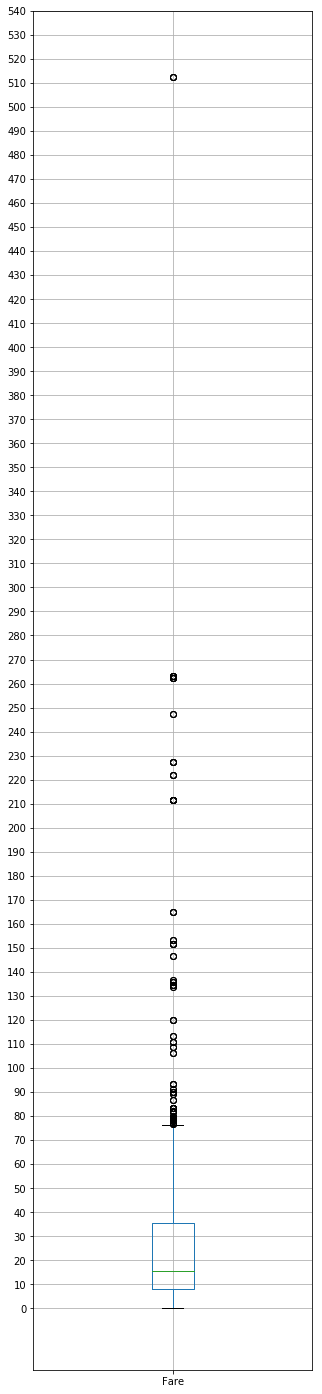

In [27]:
# box-whisker plot
df.Fare.plot(kind='box', grid=True, yticks=np.arange(0,550,10), figsize=(5,25))

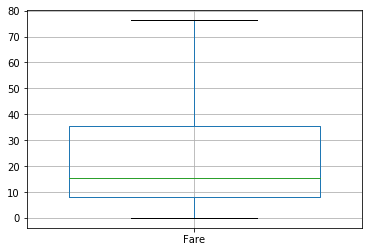

In [28]:
df.boxplot("Fare", grid=True, showfliers=False, widths=0.75)

In [29]:
# use .describe(include='all') to get statistics for all  columns including non-numeric ones
df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,926.000000,291,1113,1115.000000,1115,1115.000000,1115.000000,1115,1115.000000,1115.000000,1115
unique,NaN,184,3,NaN,1115,NaN,NaN,2,NaN,NaN,793
top,NaN,C23 C25 C27,S,NaN,"Vande Velde, Mr. Johannes Joseph",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,792,NaN,1,NaN,NaN,711,NaN,NaN,8
mean,30.127797,NaN,NaN,36.041001,NaN,0.395516,2.236771,NaN,0.525561,-178.089686,NaN
std,14.653751,NaN,NaN,54.693669,NaN,0.809824,0.853492,NaN,1.061832,356.109701,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,8.039600,NaN,0.000000,1.000000,NaN,0.000000,0.000000,NaN
50%,28.500000,NaN,NaN,15.500000,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,35.500000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [30]:
df.describe(exclude=[np.number])
#df.describe(include=[np.object])

,Cabin,Embarked,Name,Sex,Ticket
count,291,1113,1115,1115,1115
unique,184,3,1115,2,793
top,C23 C25 C27,S,"Vande Velde, Mr. Johannes Joseph",male,CA. 2343
freq,6,792,1,711,8


In [31]:
df.describe(include=[np.number], percentiles =[.33,.67,.95])

,Age,Fare,Parch,Pclass,SibSp,Survived
count,926.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,30.127797,36.041001,0.395516,2.236771,0.525561,-178.089686
std,14.653751,54.693669,0.809824,0.853492,1.061832,356.109701
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
33%,23.000000,9.480146,0.000000,2.000000,0.000000,0.000000
50%,28.500000,15.500000,0.000000,3.000000,0.000000,0.000000
67%,35.000000,27.550300,0.000000,3.000000,1.000000,0.000000
95%,57.000000,135.633300,2.000000,3.000000,2.000000,1.000000
max,80.000000,512.329200,6.000000,3.000000,8.000000,1.000000


In [32]:
# categorical column : Counts
df.Sex.value_counts()

male      711
female    404
Name: Sex, dtype: int64

In [33]:
# categorical column : Proprotions
df.Sex.value_counts(normalize=True)

male      0.637668
female    0.362332
Name: Sex, dtype: float64

In [34]:
# apply on other columns
df[(df.Cabin.notnull()) & (df.Survived != -888)].Survived.value_counts(normalize=True) 

1    0.666667
0    0.333333
Name: Survived, dtype: float64

In [35]:
df[(df.Cabin.isnull()) & (df.Survived != -888)].Survived.value_counts(normalize=True) 

0    0.700146
1    0.299854
Name: Survived, dtype: float64

In [36]:
df[(df.Pclass==1) & (df.Survived != -888)].Survived.value_counts(normalize=True) 

1    0.62963
0    0.37037
Name: Survived, dtype: float64

In [37]:
df[(df.Pclass==2) & (df.Survived != -888)].Survived.value_counts(normalize=True) 

0    0.527174
1    0.472826
Name: Survived, dtype: float64

In [38]:
df[(df.Pclass==3) & (df.Survived != -888)].Survived.value_counts(normalize=True) 

0    0.757637
1    0.242363
Name: Survived, dtype: float64

In [39]:
# count : Passenger class
df.Pclass.value_counts() 

3    569
1    305
2    241
Name: Pclass, dtype: int64

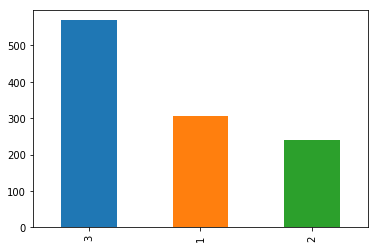

In [40]:
# visualize counts
df.Pclass.value_counts().plot(kind='bar')

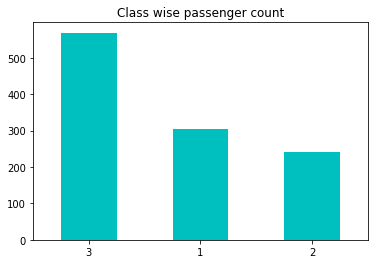

In [41]:
# title : to set title, color : to set color,  rot : to rotate labels 
df.Pclass.value_counts().plot(kind='bar',rot = 0, title='Class wise passenger count', color='c')

## Distributions

In [42]:
df.Age.mode()

0    24.0
dtype: float64

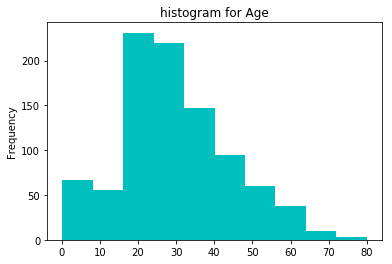

In [43]:
# use hist to create histogram
df.Age.plot(kind='hist', title='histogram for Age', color='c');

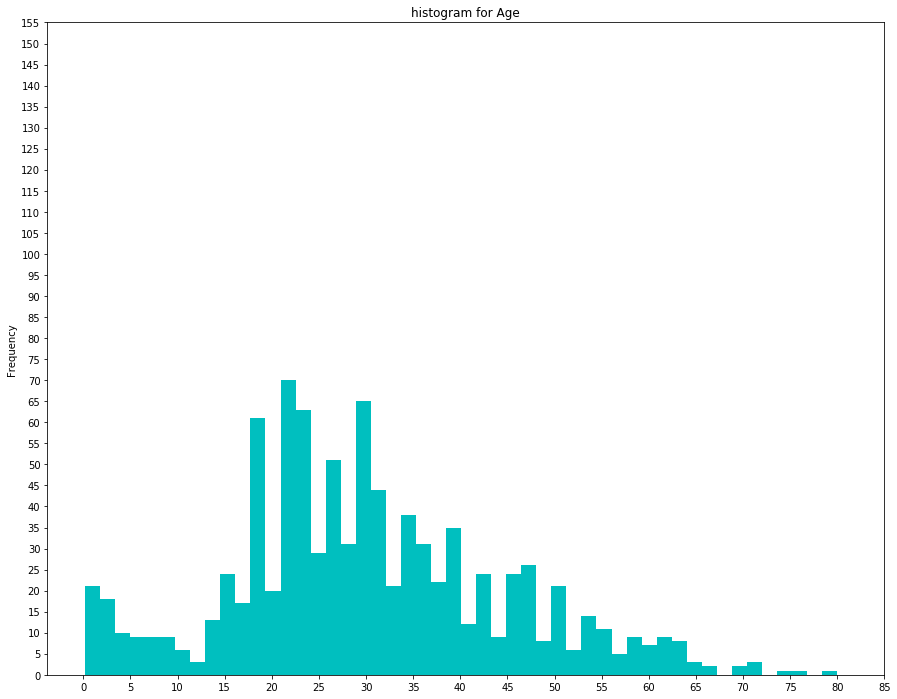

In [44]:
# use bins to add or remove bins
# bins = Number of histogram bins to be used, default value is 10
df.Age.plot(kind='hist', title='histogram for Age', color='c', bins=50, xticks=np.arange(0,90,5),yticks=np.arange(0,160,5), figsize=(15,12));

In [45]:
df[(df.Survived != -888) & (df.Age.notnull())&(df.Age >= 21) & (df.Age <=30)].groupby(['Age'])['Age'].count()

Age
21.0    24
22.0    27
23.0    15
23.5     1
24.0    30
24.5     1
25.0    23
26.0    18
27.0    18
28.0    25
28.5     2
29.0    20
30.0    25
Name: Age, dtype: int64

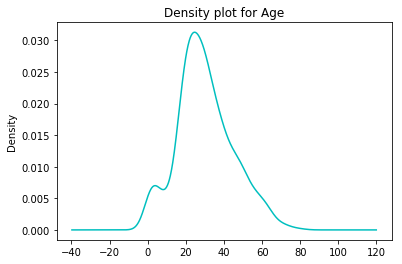

In [46]:
# use kde for density plot
#Kernel Density Estimation
df.Age.plot(kind='kde', title='Density plot for Age', color='c');

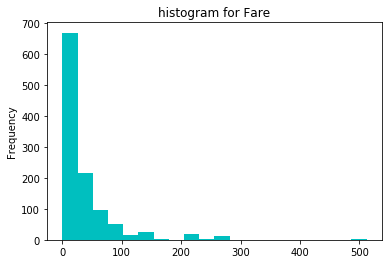

In [47]:
# histogram for fare
df.Fare.plot(kind='hist', title='histogram for Fare', color='c', bins=20);

In [48]:
print('skewness for age : {0:.2f}'.format(df.Age.skew()))
print('skewness for fare : {0:.2f}'.format(df.Fare.skew()))
print('skewness for fare : {0:.0f}'.format(df.Fare.skew()))
print('skewness for fare : {0}'.format(df.Fare.skew()))
print('skewness for fare : {0}'.format(df.Pclass.skew()))



skewness for age : 0.38
skewness for fare : 4.13
skewness for fare : 4
skewness for fare : 4.127537011277668
skewness for fare : -0.47329066990452145


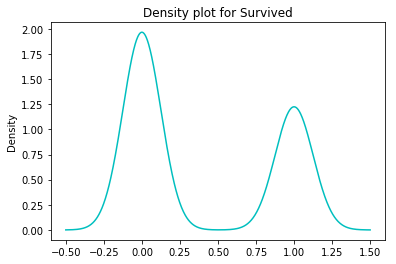

In [49]:
df[df.Survived != -888].Survived.plot(kind='kde', title='Density plot for Survived', color='c');

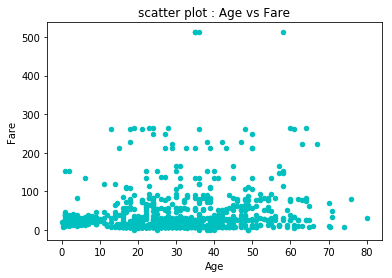

In [50]:
# use scatter plot for bi-variate distribution
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare');

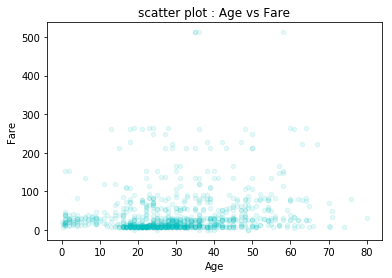

In [51]:
# use alpha to set the transparency
df.plot.scatter(x='Age', y='Fare', color='c', title='scatter plot : Age vs Fare', alpha=0.1);

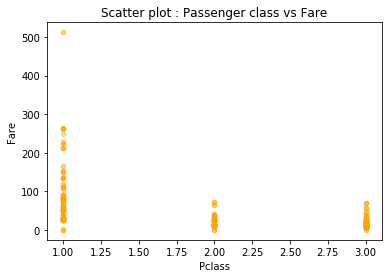

In [52]:
df.plot.scatter(x='Pclass', y='Fare', color='orange', title='Scatter plot : Passenger class vs Fare', alpha=0.15);

## Grouping and Aggregations

In [53]:
# group by 
df.groupby('Sex').Age.median()

Sex
female    28.0
male      29.0
Name: Age, dtype: float64

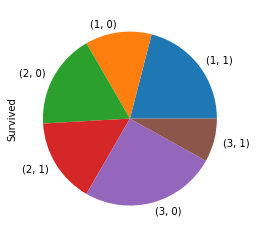

In [54]:
df[df.Survived != -888].groupby('Pclass').Survived.value_counts(normalize=True).plot(kind='pie')

In [55]:
# group by 
df.groupby(['Pclass']).Fare.median()

Pclass
1    61.9792
2    14.5000
3     8.0500
Name: Fare, dtype: float64

In [56]:
df[(df.Pclass == 1) & (df.Fare >= 20) &(df.Fare <= 30)].groupby('Pclass')['Fare'].value_counts(sort=True)

Pclass  Fare   
1       26.5500    19
        27.7208     7
        29.7000     5
        30.0000     5
        26.0000     4
        26.2875     3
        25.9292     2
        28.5000     2
        25.5875     1
        25.7000     1
        25.9250     1
        26.2833     1
        26.3875     1
        27.4458     1
        27.7500     1
        28.5375     1
        28.7125     1
Name: Fare, dtype: int64

In [57]:
df.groupby(['Pclass']).Age.median()

Pclass
1    38.0
2    28.5
3    24.0
Name: Age, dtype: float64

In [58]:
df.groupby(['Pclass'])['Fare','Age'].median()

,Fare,Age
Pclass,,
1,61.9792,38.0
2,14.5000,28.5
3,8.0500,24.0


In [59]:
df.groupby(['Pclass'])['Fare'].mean()

Pclass
1    89.379413
2    21.652870
3    13.544206
Name: Fare, dtype: float64

In [60]:
df.groupby(['Pclass']).agg({'Fare' : 'mean', 'Age' : 'median'})

,Fare,Age
Pclass,,
1,89.379413,38.0
2,21.652870,28.5
3,13.544206,24.0


In [61]:
# more complicated aggregations 
aggregations = {
    'Fare': { # work on the "Fare" column
        'mean_Fare': 'mean',  # get the mean fare
        'median_Fare': 'median', # get median fare
        'max_Fare': max,
        'min_Fare': np.min
    },
    'Age': {     # work on the "Age" column
        'median_Age': 'median',   # Find the max, call the result "max_date"
        'min_Age': min,
        'max_Age': max,
        'range_Age': lambda x: max(x) - min(x)  # Calculate the age range per group
    }
}

In [62]:
df.groupby(['Pclass']).agg(aggregations)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age                  \
        mean_Fare median_Fare  max_Fare min_Fare median_Age min_Age max_Age   
Pclass                                                                        
1       89.379413     61.9792  512.3292      0.0       38.0    0.92    80.0   
2       21.652870     14.5000   73.5000      0.0       28.5    0.67    70.0   
3       13.544206      8.0500   69.5500      0.0       24.0    0.17    74.0   

                  
       range_Age  
Pclass            
1          79.08  
2          69.33  
3          73.83

In [63]:
# names keys and index values have to be same, else result will have 'NaN'
def my_agg(x):
    
    names = {
        'Mean Fare': x['Fare'].mean(),
        'Max Fare': x['Fare'].max(),
        'Age Range': x['Age'].max()-x['Age'].min() }
    
    return pd.Series(names, index=['Mean Fare', 'Max Fare', 'Age Range'])

In [64]:
df.groupby('Pclass').apply(my_agg)

,Mean Fare,Max Fare,Age Range
Pclass,,,
1,89.379413,512.3292,79.08
2,21.652870,73.5000,69.33
3,13.544206,69.5500,73.83


In [65]:
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.5542
2       C           24.0000
        Q           12.3500
        S           14.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [66]:
df[df.Survived != -888].groupby(['Pclass', 'Survived']).Fare.median().unstack()

Survived,0,1
Pclass,,
1,44.75,77.9583
2,13.00,21.0000
3,8.05,8.5167


## Crosstabs

In [67]:
# crosstab on Sex and Pclass
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,139,98,167
male,166,143,402


In [68]:
pd.crosstab(df.Sex, df.Pclass).unstack()

Pclass  Sex   
1       female    139
        male      166
2       female     98
        male      143
3       female    167
        male      402
dtype: int64

In [69]:
pd.crosstab(df.Pclass, df[df.Survived != -888].Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [70]:
df[df.Survived != -888].groupby('Pclass').Survived.value_counts(normalize=True).unstack()

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


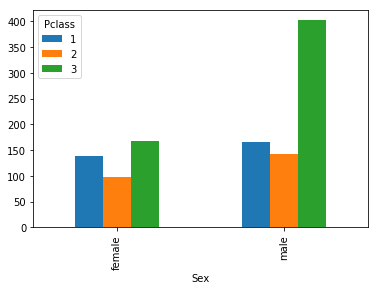

In [71]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar');

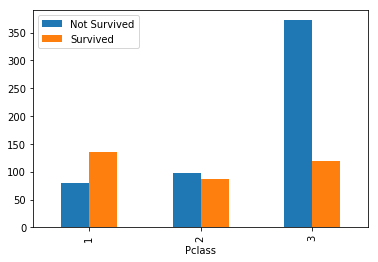

In [72]:
ax = pd.crosstab(df.Pclass, df.Survived[df.Survived != -888]).plot(kind='bar');
ax.legend(['Not Survived','Survived'])

## Pivots

In [73]:
# pivot table
df.pivot_table(index='Sex',columns = 'Pclass',values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,36.869231,27.993958,21.525772
male,41.072867,30.297239,26.123333


In [74]:

from scipy import stats

result = df.pivot_table(index='Sex',columns = 'Pclass',values='Age', aggfunc=stats.mode)

print('\n')
print('Class {0} ,mode age for {1} is : {2}'. format(1,'female',result[1]['female'].mode))
print('Class {0} ,mode-count age for {1} is : {2}'. format(1,'female',result[1]['female'].count))
print('\n')
print(result[1].keys())
print('\n')
print(type(result[1].values))
print('\n')
print(result[1].values)
print('\n')
result



Class 1 ,mode age for female is : [35.]
Class 1 ,mode-count age for female is : [8]


Index(['female', 'male'], dtype='object', name='Sex')


<class 'numpy.ndarray'>


[ModeResult(mode=array([35.]), count=array([8]))
 ModeResult(mode=array([36.]), count=array([7]))]




Pclass,1,2,3
Sex,,,
female,"([35.0], [8])","([24.0], [9])","([22.0], [9])"
male,"([36.0], [7])","([30.0], [8])","([21.0], [18])"


In [75]:
df.groupby(['Sex','Pclass']).Age.mean()

Sex     Pclass
female  1         36.869231
        2         27.993958
        3         21.525772
male    1         41.072867
        2         30.297239
        3         26.123333
Name: Age, dtype: float64

In [76]:
df.groupby(['Sex','Pclass']).Age.mean()['female']

Pclass
1    36.869231
2    27.993958
3    21.525772
Name: Age, dtype: float64

In [77]:
type(df.groupby(['Sex','Pclass']).Age.mean()['female'])

pandas.core.series.Series

In [78]:
df.groupby(['Sex','Pclass']).Age.mean()['female'].values

array([36.86923077, 27.99395833, 21.52577236])

In [79]:
df.groupby(['Sex','Pclass']).Age.mean()['female'][1]

36.86923076923077

In [80]:
df.groupby(['Sex','Pclass']).Age.mean()['female'].get(1)

36.86923076923077

In [81]:
df.groupby(['Sex','Pclass']).Age.mean()['female'].keys()

Int64Index([1, 2, 3], dtype='int64', name='Pclass')

In [82]:
df.groupby(['Sex','Pclass']).Age.mean().unstack()

Pclass,1,2,3
Sex,,,
female,36.869231,27.993958,21.525772
male,41.072867,30.297239,26.123333


## Data Munging : Working with missing values

In [83]:
# use .info() to detect missing values (if any)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1309
Data columns (total 11 columns):
Age         926 non-null float64
Cabin       291 non-null object
Embarked    1113 non-null object
Fare        1115 non-null float64
Name        1115 non-null object
Parch       1115 non-null int64
Pclass      1115 non-null int64
Sex         1115 non-null object
SibSp       1115 non-null int64
Survived    1115 non-null int64
Ticket      1115 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 144.5+ KB


### Feature : Embarked

In [84]:
# extract rows with Embarked as Null
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [85]:
# how many people embarked at different points
df.Embarked.value_counts()

S    792
C    233
Q     88
Name: Embarked, dtype: int64

In [86]:
# which embarked point has higher survival count
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [87]:
# impute the missing values with 'S'
# df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
# df.Embarked.fillna('S', inplace=True)

In [88]:
# Option 2 : explore the fare of each class for each embarkment point
df.groupby(['Pclass', 'Embarked']).Fare.median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.5542
2       C           24.0000
        Q           12.3500
        S           14.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [89]:
# replace the missing values with 'C'
df.Embarked.fillna('C', inplace=True)

In [90]:
# check if any null value remaining
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [91]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1309
Data columns (total 11 columns):
Age         926 non-null float64
Cabin       291 non-null object
Embarked    1115 non-null object
Fare        1115 non-null float64
Name        1115 non-null object
Parch       1115 non-null int64
Pclass      1115 non-null int64
Sex         1115 non-null object
SibSp       1115 non-null int64
Survived    1115 non-null int64
Ticket      1115 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 144.5+ KB


### Feature : Fare

In [92]:
#df[df.index == 1009].Fare = np.NaN
df.loc[df.index == 1009, 'Fare'] = np.NaN

In [93]:
missing_fare = df[df.Fare.isnull()]
Embarked_mf = np.NaN
Pclass_mf = np.NaN
if len(missing_fare) > 0 :
    Embarked_mf = missing_fare.Embarked.values.item(0)
    Pclass_mf = missing_fare['Pclass'].values.item(0)
    print(Embarked_mf)
    print(Pclass_mf)


S
3


In [94]:
median_fare = df.loc[(df.Pclass == Pclass_mf) & (df.Embarked == Embarked_mf),'Fare'].median()
print(median_fare)

8.05


In [95]:
df.Fare.fillna(median_fare, inplace=True)

In [96]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1309
Data columns (total 11 columns):
Age         926 non-null float64
Cabin       291 non-null object
Embarked    1115 non-null object
Fare        1115 non-null float64
Name        1115 non-null object
Parch       1115 non-null int64
Pclass      1115 non-null int64
Sex         1115 non-null object
SibSp       1115 non-null int64
Survived    1115 non-null int64
Ticket      1115 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 144.5+ KB


### Feature : Age

In [97]:
# set maximum number of rows to be displayed
pd.options.display.max_rows = 15

In [98]:
# return null rows
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
30,NaN,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0,349216
32,NaN,B78,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1,PC 17569
...,...,...,...,...,...,...,...,...,...,...,...
1160,NaN,NaN,S,8.0500,"Howard, Miss. May Elizabeth",0,3,female,0,-888,A. 2. 39186


#### option 1 : replace all missing age with mean value

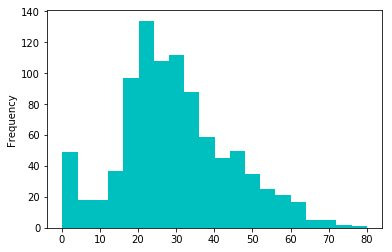

In [99]:
df.Age.plot(kind='hist', bins=20, color='c');

In [100]:
# get mean
df.Age.mean()

30.127796976241896

issue : due to few high values of 70's and 80's pushing the overall mean



In [101]:
# replace the missing values
# df.Age.fillna(df.Age.mean(), inplace=True)

#### option 2 : replace with median age of gender

In [220]:
# median values
df.groupby('Sex').Age.median()

Sex
female    28.0
male      29.0
Name: Age, dtype: float64

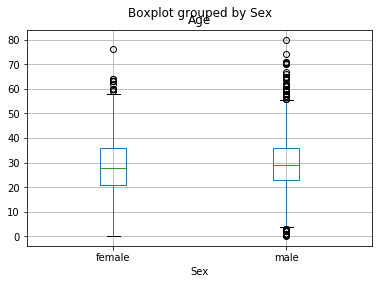

In [221]:
# visualize using boxplot
df[df.Age.notnull()].boxplot('Age','Sex');

In [222]:
# replace : 
#age_sed_median = df.groupby('Age').Sex.transform('median')
#df.Age.fillna(age_sex_median, inplace=True)

#### option 3 : replace with median age of Pclass

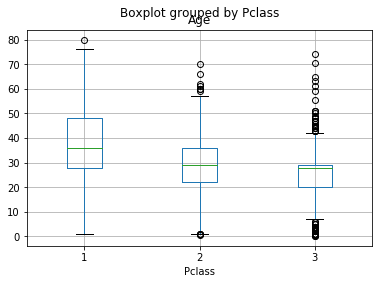

In [223]:
df[df.Age.notnull()].boxplot('Age','Pclass');

In [225]:
# replace : 
#pclass_age_median = df.groupby('Pclass').Age.transform('median')
#df.Age.fillna(pclass_age_median , inplace=True)



#### option 4 : replace with median age of title

In [107]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
6                                        Moran, Mr. James
7                                 McCarthy, Mr. Timothy J
                              ...                        
1296                         Frauenthal, Mr. Isaac Gerald
1297         Nourney, Mr. Alfred (Baron von Drachstedt")"
1299                           Widener, Mr. George Dunton
1301                            Peacock, Miss. Treasteall
1303      Minahan, Mrs. William Edward (Lillian E Thorpe)
1306                         Oliva y Ocana, Dona. Fermina
1309                             Peter, Master. Michael J
Name: Name, Length: 1115, dtype: object

In [245]:
# Function to extract the title from the name 
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [230]:
# use map function to apply the function on each Name value row i
#df.Name.map(lambda x : GetTitle(x)) 
# alternatively you can use : df.Name.map(GetTitle)

In [237]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  , 29.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 28.  , 34.  , 15.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 67.  , 76.  ,
       18.5 , 11.5 ,  0.33,  0.17])

In [246]:
#df.Name.map(lambda x : GetTitle(x)).unique()
df.Name.map(GetTitle).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [248]:
# Function to extract the title from the name 
def GetTitle(name):
    title_group = {'mr' : 'Mr', 
               'mrs' : 'Mrs', 
               'miss' : 'Miss', 
               'master' : 'Master',
               'don' : 'Sir',
               'rev' : 'Sir',
               'dr' : 'Officer',
               'mme' : 'Mrs',
               'ms' : 'Mrs',
               'major' : 'Officer',
               'lady' : 'Lady',
               'sir' : 'Sir',
               'mlle' : 'Miss',
               'col' : 'Officer',
               'capt' : 'Officer',
               'the countess' : 'Lady',
               'jonkheer' : 'Sir',
               'dona' : 'Lady'
                 }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]



In [249]:
#df.Name.map(lambda x : GetTitle(x)).unique()
df.Name.map(GetTitle).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Sir', 'Officer', 'Lady'],
      dtype=object)

In [250]:
# create Title feature
df['Title'] =  df.Name.map(lambda x : GetTitle(x))

In [251]:
# head 
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


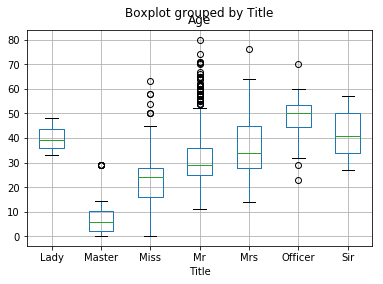

In [252]:
# Box plot of Age with title
df[df.Age.notnull()].boxplot('Age','Title');

In [115]:
# replace missing values
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median , inplace=True)

In [116]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1309
Data columns (total 12 columns):
Age         1115 non-null float64
Cabin       291 non-null object
Embarked    1115 non-null object
Fare        1115 non-null float64
Name        1115 non-null object
Parch       1115 non-null int64
Pclass      1115 non-null int64
Sex         1115 non-null object
SibSp       1115 non-null int64
Survived    1115 non-null int64
Ticket      1115 non-null object
Title       1115 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 153.2+ KB


## Working with outliers

### Age

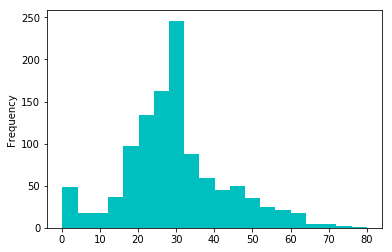

In [254]:
# use histogram to get understand the distribution
df.Age.plot(kind='hist', bins=20, color='c');

In [255]:
df.loc[df.Age > 70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,Mrs


### Fare

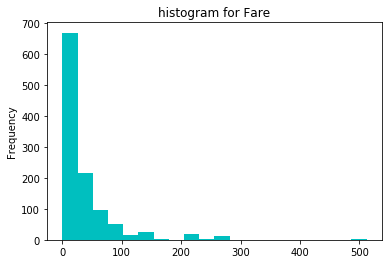

In [256]:
# histogram for fare
df.Fare.plot(kind='hist', title='histogram for Fare', bins=20, color='c');

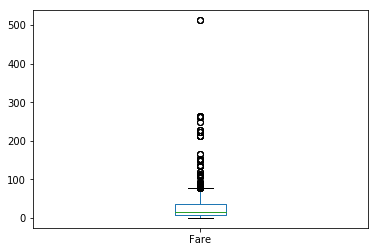

In [257]:
# box plot to indentify outliers 
df.Fare.plot(kind='box');

In [258]:
# look into the outliers
df.loc[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs


In [259]:
# Try some transformations to reduce the skewness
LogFare = np.log(df.Fare + 1.0) # Adding 1 to accomodate zero fares : log(0) is not defined

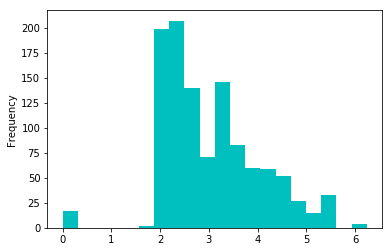

In [260]:
# Histogram of LogFare
LogFare.plot(kind='hist', color='c', bins=20);

In [268]:
# binning
pd.qcut(df.Fare, 4, labels=False)

PassengerId
1       0
2       3
3       0
4       3
5       1
6       1
7       3
       ..
1296    2
1297    1
1299    3
1301    1
1303    3
1306    3
1309    2
Name: Fare, Length: 1115, dtype: int64

In [269]:
# binning
pd.qcut(df.Fare, 4, labels=['Q1','Q2','Q3','Q4'])

PassengerId
1       Q1
2       Q4
3       Q1
4       Q4
5       Q2
6       Q2
7       Q4
        ..
1296    Q3
1297    Q2
1299    Q4
1301    Q2
1303    Q4
1306    Q4
1309    Q3
Name: Fare, Length: 1115, dtype: category
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [267]:
# binning
pd.qcut(df.Fare, 4)

PassengerId
1        (-0.001, 8.04]
2       (35.5, 512.329]
3        (-0.001, 8.04]
4       (35.5, 512.329]
5          (8.04, 15.5]
6          (8.04, 15.5]
7       (35.5, 512.329]
             ...       
1296       (15.5, 35.5]
1297       (8.04, 15.5]
1299    (35.5, 512.329]
1301       (8.04, 15.5]
1303    (35.5, 512.329]
1306    (35.5, 512.329]
1309       (15.5, 35.5]
Name: Fare, Length: 1115, dtype: category
Categories (4, interval[float64]): [(-0.001, 8.04] < (8.04, 15.5] < (15.5, 35.5] < (35.5, 512.329]]

In [270]:
pd.qcut(df.Fare, 4, labels=['very_low','low','high','very_high']) # discretization

PassengerId
1        very_low
2       very_high
3        very_low
4       very_high
5             low
6             low
7       very_high
          ...    
1296         high
1297          low
1299    very_high
1301          low
1303    very_high
1306    very_high
1309         high
Name: Fare, Length: 1115, dtype: category
Categories (4, object): [very_low < low < high < very_high]

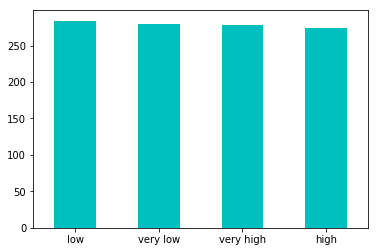

In [278]:
pd.qcut(df.Fare, 4, labels=['very low','low','high','very high']).value_counts().plot(kind='bar', color='c', rot=0);

In [283]:
# create fare bin feature
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['Very low','Low','High','Very high'])

In [284]:
df.head()


,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin
PassengerId,,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr,Very low
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs,Very high
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss,Very low
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs,Very high
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr,Low


## Feature Engineering

### Feature : Age State ( Adult or Child )

In [285]:
# AgeState based on Age
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult','Child')

In [286]:
# AgeState Counts
df['AgeState'].value_counts()

Adult    976
Child    139
Name: AgeState, dtype: int64

In [287]:
# crosstab
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,497,52
1,281,61


### Feature : FamilySize

In [290]:
# Family : Adding Parents with Siblings
df['FamilySize'] = df.Parch + df.SibSp + 1 # 1 for self

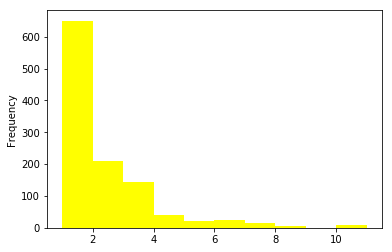

In [298]:
# explore the family feature
df['FamilySize'].plot(kind='hist', color='yellow');

In [299]:
# further explore this family with max family members
df.loc[df.FamilySize == df.FamilySize.max(),['Name','Survived','FamilySize','Ticket','Fare']]

,Name,Survived,FamilySize,Ticket,Fare
PassengerId,,,,,
160,"Sage, Master. Thomas Henry",0,11,CA. 2343,69.55
181,"Sage, Miss. Constance Gladys",0,11,CA. 2343,69.55
202,"Sage, Mr. Frederick",0,11,CA. 2343,69.55
325,"Sage, Mr. George John Jr",0,11,CA. 2343,69.55
793,"Sage, Miss. Stella Anna",0,11,CA. 2343,69.55
847,"Sage, Mr. Douglas Bullen",0,11,CA. 2343,69.55
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11,CA. 2343,69.55
1252,"Sage, Master. William Henry",-888,11,CA. 2343,69.55


In [309]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


### Feature : IsMother

In [310]:
# a lady aged more thana 18 who has Parch >0 and is married (not Miss)
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch > 0) & (df.Age > 18) & (df.Title != 'Miss')), 1, 0)

In [311]:
# Crosstab with IsMother
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


### Deck

In [328]:
# explore Cabin values
df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
6        NaN
7        E46
        ... 
1296     D40
1297     D38
1299     C80
1301     NaN
1303     C78
1306    C105
1309     NaN
Name: Cabin, Length: 1115, dtype: object

In [313]:
# use unique to get unique values for Cabin feature
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [334]:
# look at the Cabin = T
df.loc[df.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,


In [332]:
# set the value to NaN
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [333]:
# look at the unique values of Cabin again
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [342]:
# extract first character of Cabin string to the deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')
#df['Deck'] = df['Cabin'].map(get_deck)
df['Deck'] = df['Cabin'].map(lambda x : get_deck(x))

In [347]:
# check counts
df.Deck.value_counts()

Z    825
C     94
B     65
D     44
E     40
A     22
F     20
G      5
Name: Deck, dtype: int64

In [144]:
# use crosstab to look into survived feature cabin wise
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [358]:
#df[df.Survived != -888].groupby('Pclass').Survived.value_counts(normalize=True).plot(kind='pie')
df[df.Survived != -888].groupby('Deck').Survived.value_counts(normalize=True).unstack()


Survived,0,1
Deck,,
A,0.533333,0.466667
B,0.255319,0.744681
C,0.406780,0.593220
D,0.242424,0.757576
E,0.250000,0.750000
F,0.384615,0.615385
G,0.500000,0.500000
Z,0.700581,0.299419


In [357]:
df.groupby('Deck').Fare.mean()

Deck
A     41.244314
B    122.383078
C    107.926598
D     54.471405
E     54.632187
F     18.621875
G     14.205000
Z     19.579211
Name: Fare, dtype: float64

In [145]:
# info command 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1309
Data columns (total 17 columns):
Age           1115 non-null float64
Cabin         290 non-null object
Embarked      1115 non-null object
Fare          1115 non-null float64
Name          1115 non-null object
Parch         1115 non-null int64
Pclass        1115 non-null int64
Sex           1115 non-null object
SibSp         1115 non-null int64
Survived      1115 non-null int64
Ticket        1115 non-null object
Title         1115 non-null object
Fare_Bin      1115 non-null category
AgeState      1115 non-null object
FamilySize    1115 non-null int64
IsMother      1115 non-null int32
Deck          1115 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 185.0+ KB


### Categorical Feature Encoding

In [359]:
# sex
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [363]:
# columns Deck, Pclass, Title, AgeState
df = pd.get_dummies(df,columns=['Deck', 'Pclass','Title', 'Fare_Bin', 'Embarked','AgeState'])

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1309
Data columns (total 39 columns):
Age                   1115 non-null float64
Cabin                 290 non-null object
Fare                  1115 non-null float64
Name                  1115 non-null object
Parch                 1115 non-null int64
Sex                   1115 non-null object
SibSp                 1115 non-null int64
Survived              1115 non-null int64
Ticket                1115 non-null object
FamilySize            1115 non-null int64
IsMother              1115 non-null int32
IsMale                1115 non-null int32
Deck_A                1115 non-null uint8
Deck_B                1115 non-null uint8
Deck_C                1115 non-null uint8
Deck_D                1115 non-null uint8
Deck_E                1115 non-null uint8
Deck_F                1115 non-null uint8
Deck_G                1115 non-null uint8
Deck_Z                1115 non-null uint8
Pclass_1              1115 non-null uint8
Pcla

### Drop and Reorder Columns

In [367]:
# drop columns
df.drop(['Cabin','Name','Ticket','Parch','SibSp','Sex'], axis=1, inplace=True)

In [368]:
# reorder columns
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [369]:
# check info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 1 to 1309
Data columns (total 33 columns):
Survived              1115 non-null int64
Age                   1115 non-null float64
Fare                  1115 non-null float64
FamilySize            1115 non-null int64
IsMother              1115 non-null int32
IsMale                1115 non-null int32
Deck_A                1115 non-null uint8
Deck_B                1115 non-null uint8
Deck_C                1115 non-null uint8
Deck_D                1115 non-null uint8
Deck_E                1115 non-null uint8
Deck_F                1115 non-null uint8
Deck_G                1115 non-null uint8
Deck_Z                1115 non-null uint8
Pclass_1              1115 non-null uint8
Pclass_2              1115 non-null uint8
Pclass_3              1115 non-null uint8
Title_Lady            1115 non-null uint8
Title_Master          1115 non-null uint8
Title_Miss            1115 non-null uint8
Title_Mr              1115 non-null uint8
Title_M

## Save Processed Dataset

In [376]:
#processed_data_path = os.path.join('data','processed')
write_train_path =  'processed_train.csv'
write_test_path = 'processed_test.csv'

In [377]:
# train data
df.loc[df.Survived != -888].to_csv(write_train_path) 
# test data
columns = [column for column in df.columns if column != 'Survived']
df.loc[df.Survived == -888, columns].to_csv(write_test_path) 

### Advanced visualization using MatPlotlib

In [387]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 67.,  55., 231., 409., 147.,  95.,  60.,  38.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

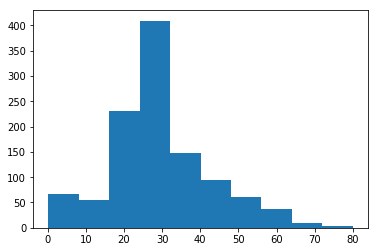

In [386]:
plt.hist(df.Age)

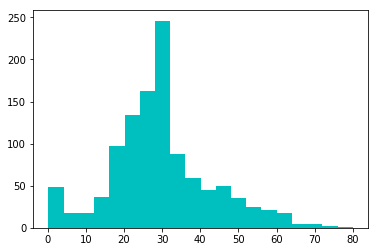

In [380]:
plt.hist(df.Age, bins=20, color='c')
plt.show()

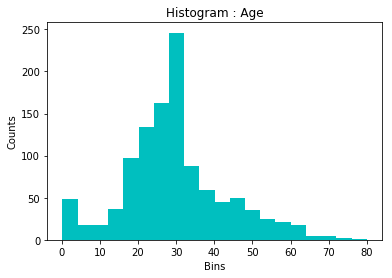

In [381]:
plt.hist(df.Age, bins=20, color='c')
plt.title('Histogram : Age')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()

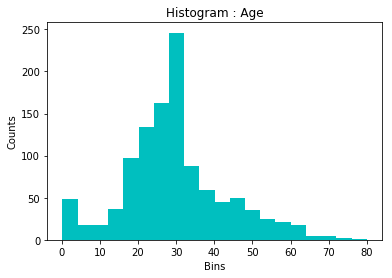

In [382]:
f , ax = plt.subplots()
ax.hist(df.Age, bins=20, color='c')
ax.set_title('Histogram : Age')
ax.set_xlabel('Bins')
ax.set_ylabel('Counts')
plt.show()

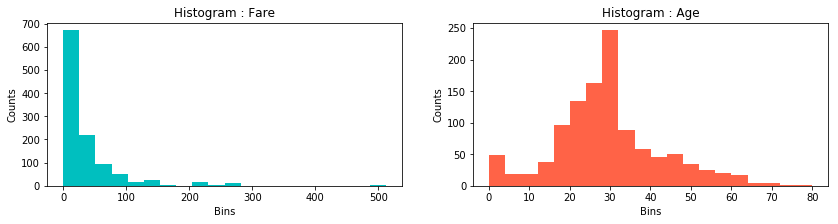

In [384]:
# Add subplots
f , (ax1, ax2) = plt.subplots(1, 2 , figsize=(14,3))

ax1.hist(df.Fare, bins=20, color='c')
ax1.set_title('Histogram : Fare')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')

ax2.hist(df.Age, bins=20, color='tomato')
ax2.set_title('Histogram : Age')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')

plt.show()

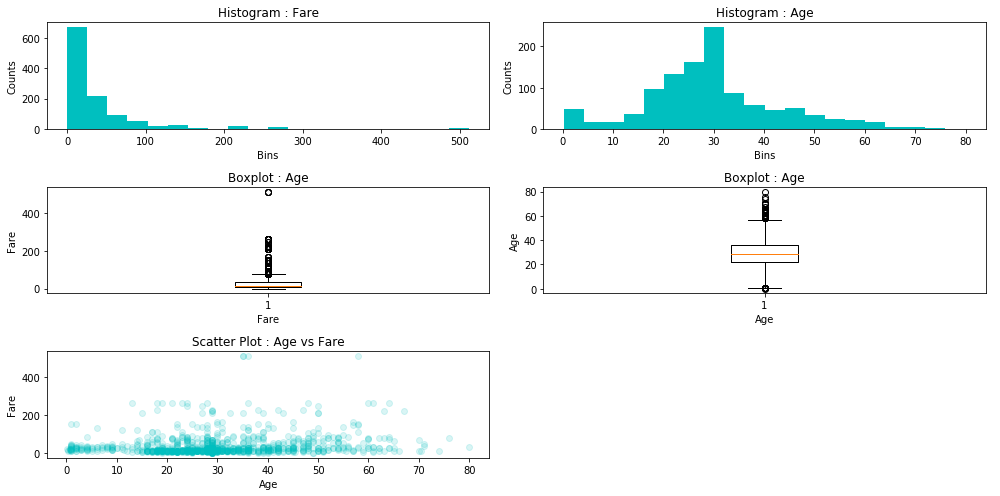

In [388]:
# Adding subplots
f , ax_arr = plt.subplots(3 , 2 , figsize=(14,7))

# Plot 1
ax_arr[0,0].hist(df.Fare, bins=20, color='c')
ax_arr[0,0].set_title('Histogram : Fare')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')

# Plot 2
ax_arr[0,1].hist(df.Age, bins=20, color='c')
ax_arr[0,1].set_title('Histogram : Age')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

# Plot 3
ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title('Boxplot : Age')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

# Plot 4
ax_arr[1,1].boxplot(df.Age.values)
ax_arr[1,1].set_title('Boxplot : Age')
ax_arr[1,1].set_xlabel('Age')
ax_arr[1,1].set_ylabel('Age')

# Plot 5
ax_arr[2,0].scatter(df.Age, df.Fare, color='c', alpha=0.15)
ax_arr[2,0].set_title('Scatter Plot : Age vs Fare')
ax_arr[2,0].set_xlabel('Age')
ax_arr[2,0].set_ylabel('Fare')

ax_arr[2,1].axis('off')
plt.tight_layout()


plt.show()

In [396]:
# family size 
family_survived = pd.crosstab(df[df.Survived != -888].FamilySize, df[df.Survived != -888].Survived)
print(family_survived)

Survived      0    1
FamilySize          
1           374  163
2            72   89
3            43   59
4             8   21
5            12    3
6            19    3
7             8    4
8             6    0
11            7    0


In [412]:
# impact of family size on survival rate
family_survived =  df[df.Survived != -888].groupby(['FamilySize','Survived']).size().unstack()
print(family_survived)

Survived        0      1
FamilySize              
1           374.0  163.0
2            72.0   89.0
3            43.0   59.0
4             8.0   21.0
5            12.0    3.0
6            19.0    3.0
7             8.0    4.0
8             6.0    NaN
11            7.0    NaN


In [415]:
family_survived.columns = ['Not Survived', 'Survived']

In [413]:
family_survived.columns

Int64Index([0, 1], dtype='int64', name='Survived')

In [416]:
family_survived


,Not Survived,Survived
FamilySize,,
1,374.0,163.0
2,72.0,89.0
3,43.0,59.0
4,8.0,21.0
5,12.0,3.0
6,19.0,3.0
7,8.0,4.0
8,6.0,NaN
11,7.0,NaN


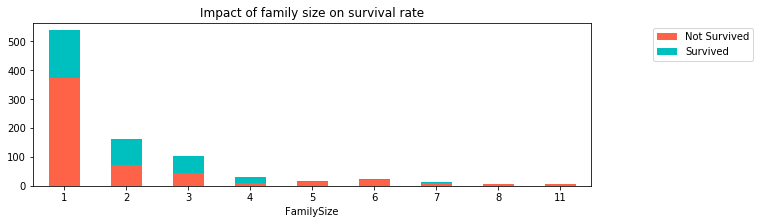

In [408]:
# Mix and Match
f, ax = plt.subplots(figsize=(10,3))
ax.set_title('Impact of family size on survival rate')
family_survived.plot(kind='bar', stacked=True, color=['tomato','c'], ax=ax, rot=0)
plt.legend(bbox_to_anchor=(1.3,1.0))
plt.show()

In [421]:
family_survived.sum(axis = 1)

FamilySize
1     537.0
2     161.0
3     102.0
4      29.0
5      15.0
6      22.0
7      12.0
8       6.0
11      7.0
dtype: float64

In [424]:
scaled_family_survived = family_survived.div(family_survived.sum(axis=1), axis=0)
scaled_family_survived

,Not Survived,Survived
FamilySize,,
1,0.696462,0.303538
2,0.447205,0.552795
3,0.421569,0.578431
4,0.275862,0.724138
5,0.800000,0.200000
6,0.863636,0.136364
7,0.666667,0.333333
8,1.000000,NaN
11,1.000000,NaN


In [426]:
scaled_family_survived.columns = ['Not Survived', 'Survived']

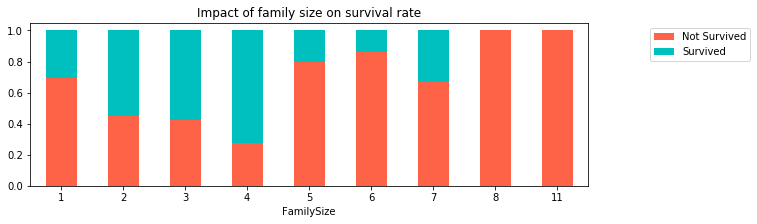

In [427]:
# Mix and Match
f, ax = plt.subplots(figsize=(10,3))
ax.set_title('Impact of family size on survival rate')
scaled_family_survived.plot(kind='bar', stacked=True, color=['tomato','c'], ax=ax, rot=0)
plt.legend(bbox_to_anchor=(1.3,1.0))
plt.show()